# INCS 615 Advanced Network and Internet Security
#### Spring 2025, INCS 615-VA1 (2854)
#### Instructor: Dr. Zhida Li
#### Email: zli74@nyit.edu

## Lab #3 (Group) - Detecting Intrusions using Machine Learning Models
### Please keep your output when you submit

# Step 1: Load the data, learn the five classes, and count the number of data points for each class
Write the Python code:
- Load the training and testing data
- Count the number of data points for Regular (0), DoS (1), R2L (2), U2R (3), Probe (4) in both training and testing datasets

You may use pandas OR numpy for extraction and removing the header:
- [_NumPy_](https://numpy.org): used to perform mathematical operations
- [_pandas_](https://pandas.pydata.org/): open source data analysis and manipulation tool

In [1]:
import numpy as np
import pandas as pd

# To do...
# Load your NSL-KDD training dataset
#data_train = pd.read_csv('KDDTrain+_20Percent_615.csv', header=None)
data_train = pd.read_csv('KDDTrain+_20Percent_615.csv')  # Keep the header

# Load your NSL-KDD testing dataset
data_test = pd.read_csv('KDDTest+_615.csv')
#data_test = pd.read_csv('KDDTest+_615.csv', header=None)
# ...


# To do...
# Count the number of data points for Regular (0), DoS (1), R2L (2), U2R (3), Probe (4) in both training and testing datasets
# training dataset
# Count the number of data points for each class in the training dataset
num_regular = data_train[data_train.iloc[:, -1] == 0].shape[0]
num_dos = data_train[data_train.iloc[:, -1] == 1].shape[0]
num_r2l = data_train[data_train.iloc[:, -1] == 2].shape[0]
num_u2r = data_train[data_train.iloc[:, -1] == 3].shape[0]
num_probe = data_train[data_train.iloc[:, -1] == 4].shape[0]
print('\Training Dataset:')
print('Regular data points:', num_regular)
print('DoS data points:', num_dos)
print('R2L data points:', num_r2l)
print('U2R data points:', num_u2r)
print('Probe data points:', num_probe)

# Count the number of data points for each class in the testing dataset
num_regular_test = data_test[data_test.iloc[:, -1] == 0].shape[0]
num_dos_test = data_test[data_test.iloc[:, -1] == 1].shape[0]
num_r2l_test = data_test[data_test.iloc[:, -1] == 2].shape[0]
num_u2r_test = data_test[data_test.iloc[:, -1] == 3].shape[0]
num_probe_test = data_test[data_test.iloc[:, -1] == 4].shape[0]

print('\nTesting Dataset:')
print('Regular data points:', num_regular_test)
print('DoS data points:', num_dos_test)
print('R2L data points:', num_r2l_test)
print('U2R data points:', num_u2r_test)
print('Probe data points:', num_probe_test)



\Training Dataset:
Regular data points: 13449
DoS data points: 9234
R2L data points: 209
U2R data points: 11
Probe data points: 2289

Testing Dataset:
Regular data points: 9711
DoS data points: 7460
R2L data points: 2885
U2R data points: 67
Probe data points: 2421


In [ ]:
#labels = data_train.iloc[:, -1]
#data_train.dtypes
cols = data_train.columns
cols


# Step 2: Prepare numerical features
Write the Python code:
- Select a method and Convert 3 categorical features (“protocol_type”, “service”, and “flag”) to numerical from both training and testing data.
  (Data should be numerical when feeding into machine learning models.)

You may use pandas OR numpy:
- [_NumPy_](https://numpy.org): used to perform mathematical operations
- [_pandas_](https://pandas.pydata.org/): open source data analysis and manipulation tool

In [13]:
categorical_features = ["protocol_type", "service", "flag"]
train_df = data_train.copy()
test_df = data_test.copy()
# n (next): Execute the next line.
# s (step): Step into a function call.
# c (continue): Continue execution until the next breakpoint or the end of the program.
# p (print): Print the value of a variable.
# q (quit): Exit the debugger.
for feature in categorical_features:
    #%debug
     # Get column position using iloc
    # try:
    #     #import pdb; pdb.set_trace()
    #     feature_position = train_df.columns.get_loc(feature)

    # except KeyError:
    #     print(f"Feature '{feature}' not found, skipping...")
    #     continue  # Skip to the next feature

    # # Generate dummy variables for the training data using iloc
    # train_dummies = pd.get_dummies(train_df.iloc[:, feature_position], prefix=feature)

    train_dummies = pd.get_dummies(train_df[feature], prefix=feature)

    #import pdb; pdb.set_trace()
    # Get the columns to ensure alignment with test data
    feature_columns = train_dummies.columns

    # Generate dummy variables for the test data
    #test_dummies = pd.get_dummies(test_df.iloc[:, feature_position], prefix=feature)
    test_dummies = pd.get_dummies(test_df[feature], prefix=feature)
    # Reindex test dummy columns to match training columns, filling missing with 0
    test_dummies = test_dummies.reindex(columns=feature_columns, fill_value=0)

    # Add dummies to dataframe using a different method
    for col in train_dummies.columns:
        train_df[col] = train_dummies[col]
        test_df[col] = test_dummies[col]
    
    # # Use assign instead of concat
    # train_df = train_df.assign(**train_dummies)
    # test_df = test_df.assign(**test_dummies)
    # # Drop original categorical column
    train_df = train_df.drop(columns=[feature])
    test_df = test_df.drop(columns=[feature])


    # train_df = pd.concat([train_df, train_dummies], axis=1)
    # test_df = pd.concat([test_df, test_dummies], axis=1)
    # train_df['labels'] = train_df['labels'].astype(int)
    # test_df['labels'] = test_df['labels'].astype(int)
    # # Drop the original categorical column from both datasets
    # #import pdb; pdb.set_trace()
    # train_df = train_df.drop(columns=[feature])
    # #import pdb; pdb.set_trace()
    # try:
    #     #test_df = test_df.drop(feature, axis=1)
    #     #import pdb; pdb.set_trace()
    #     test_df = test_df.drop(columns=[feature])
    # except KeyError:
    #     print(f"Feature '{feature}' not found in test data, skipping...")
    #     continue  # Skip to the next feature
    # #test_df = test_df.drop(feature, axis=1)

    # Concatenate the dummy variables to the datasets
print("converted")


converted


In [14]:

import numpy as np #import numpy
from scipy.stats import zscore
# Get training and test data and labels for model training
# Convert pandas DataFrames to NumPy arrays
features_train = train_df.drop(columns=train_df.columns[-1]).values  # Exclude last column (target)
labels_train = train_df['labels'].values  # Target variable in the last column
features_test = test_df.drop(columns=test_df.columns[-1]).values  # Exclude last column (target)
labels_test = test_df['labels'].values  # Target variable in the last column

# Handle NaNs before applying zscore
#import pdb; pdb.set_trace()
features_train = np.nan_to_num(features_train).astype(np.float64)  # Replace NaNs, convert to float64
features_test = np.nan_to_num(features_test).astype(np.float64)  # Replace NaNs, convert to float64

# Normalize the training and test datasets using zscore
features_train = zscore(features_train, axis=0, ddof=1)
features_test = zscore(features_test, axis=0, ddof=1)




In [25]:
#train_df = data_train.copy()
np.unique(labels_train) 
np.unique(labels_test) 


array([0, 1, 2, 3, 4])

# Step 3: Nomalize the data and create ML models
Write the Python code to:
- Normalize the two datasets (training and test data);  
- Run a ML model. Various ML algorithms are available in the ML library (https://scikit-learn.org/stable/index.html).

If you are running the exercise on your local platform, download and install machine learning (ML) library:  
	https://scikit-learn.org/stable/index.html

The Python libraries installed by [_pip_](https://pip.pypa.io/en/stable/) are:
- [_SciPy_](https://scipy.org): dependency of the _scikit-learn_ library.
- _SciPy_'s _zscore_: function used to perform normalization.
- [_scikit-learn_](https://scikit-learn.org/stable): employed for processing data and calculating performance metrics.

In [23]:
# Import the Python libraries
import time

# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Assuming you're using RandomForest

# Create and train your model
time_start = time.time()  # training time - start
#model = DecisionTreeClassifier()  # Initialize the DecisionTreeClassifier
# Initialize RandomForestClassifier with parameters
model = RandomForestClassifier(n_estimators=200, 
                               max_depth=10, 
                               random_state=42,
                               class_weight='balanced'
                               )

# Generate the model using training data and labels
model.fit(features_train, labels_train)

time_end = time.time()  # training time - end
training_time = time_end - time_start
print('Training completed')
print('Training time:', training_time)

Training completed
Training time: 2.497313976287842


# Step 4:
Write the Python code to:
- Test the developed model on the test dataset named "features_test"
- Calculate Accuracy and F1-Score based on test labels and predicted labels.   

In [ ]:
# Import the Python libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Testing, for sklearn libriary if applicable
predicted_labels = model.predict(features_test)

# To do...
# Performance metrics
# accuracy = accuracy_score(labels_test, predicted_labels)
# fscore = f1_score(labels_test, predicted_labels)
# Okay, let's discuss the meaning of accuracy_score and f1_score in the context of your intrusion detection task.

# Accuracy Score:

# Definition: Accuracy is the most intuitive performance metric and represents the proportion of correctly classified samples out of the total number of samples.
# Formula: Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
# Interpretation: In your case, accuracy would tell you the percentage of network connections that your model correctly classified as either normal or an intrusion (DoS, R2L, U2R, Probe). For example, an accuracy of 0.95 would mean that the model correctly classified 95% of the connections in the test dataset.
# F1-Score:

# Definition: The F1-score is a more comprehensive metric that considers both precision and recall. It is the harmonic mean of precision and recall, providing a balanced measure of a model's performance, especially when dealing with imbalanced datasets.
# Precision: Precision measures the proportion of correctly predicted positive instances (intrusions) out of all instances predicted as positive. It answers the question: "Of all the connections the model flagged as intrusions, how many were actually intrusions?"
# Recall: Recall measures the proportion of correctly predicted positive instances (intrusions) out of all actual positive instances. It answers the question: "Of all the actual intrusions, how many did the model correctly identify?"
# Formula: F1-score = 2 * (Precision * Recall) / (Precision + Recall)
# Interpretation: In your intrusion detection scenario, the F1-score provides a balanced measure of how well the model identifies intrusions while minimizing false positives and false negatives. A higher F1-score indicates a better balance between precision and recall, which is desirable in security applications where both identifying true intrusions and minimizing false alarms are important.
# Why both are important:

# Accuracy alone can be misleading, especially with imbalanced datasets. For example, if your dataset has 95% normal connections and only 5% intrusions, a model that simply predicts "normal" for every connection would achieve 95% accuracy, even though it fails to detect any intrusions.
# The F1-score provides a more balanced evaluation by considering both precision and recall, making it more suitable for intrusion detection where identifying true intrusions is critical, even if it means some false alarms.
# In your code:

#print(np.unique(labels_test))
accuracy = accuracy_score(labels_test, predicted_labels)
fscore = f1_score(labels_test, predicted_labels, average="weighted")
# Use code with caution
# These lines calculate the accuracy and F1-score of your model based on the true labels (labels_test) and the predicted labels (predicted_labels) for the test dataset. These metrics help you evaluate the performance of your intrusion detection model.

# I hope this clarifies the meaning and importance of accuracy_score and f1_score in your case. Let me know if you have any further questions.
# To do...
# Show the results: accuracy and training time
print('Accuracy:', accuracy)
print('F1-Score:', fscore)

# Go back to Step 3 to adjust the hyper-parameters and retrain the model, to achieve better results.


Accuracy: 0.8288679914833215
F1-Score: 0.7902108321412566
Taining time: 2.497313976287842


<Figure size 1200x800 with 0 Axes>

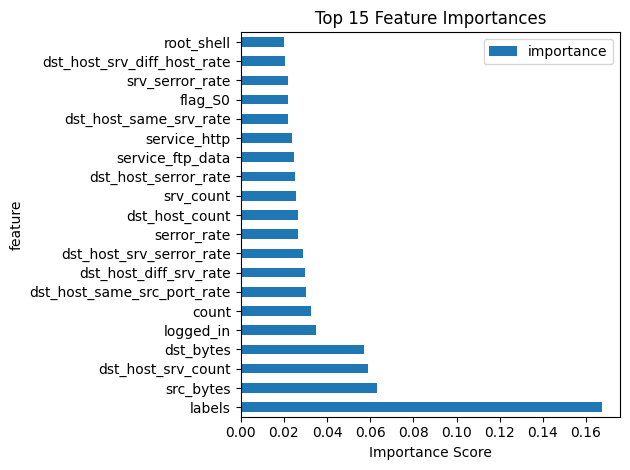

Number of features: 118
Number of classes: 5
Class labels: [0 1 2 3 4]
Unique values in training labels:
[0 1 2 3 4]
Count of each value:
0    13449
1     9234
2      209
3       11
4     2289
Name: count, dtype: int64

Unique values in test labels:
[0 1 2 3 4]
Count of each value:
0    9711
1    7460
2    2885
3      67
4    2421
Name: count, dtype: int64
Original training labels:
labels
0    13449
1     9234
2      209
3       11
4     2289
Name: count, dtype: int64
Original test labels:
labels
0    9711
1    7460
2    2885
3      67
4    2421
Name: count, dtype: int64


In [41]:
feature_importances = model.feature_importances_
feature_names = train_df.columns[:-1]
importance_df = pd.DataFrame({
    'feature':feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

import matplotlib.pyplot as plt
# Plot feature importance
plt.figure(figsize=(12, 8))
importance_df.head(20).plot(x='feature', y='importance', kind='barh')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
# importance_df.head(10)
# model.get_params()
# Get number of features
print(f"Number of features: {model.n_features_in_}")

# Get feature names (if available)
#print(f"Feature names: {model.feature_names_in_}")
# Get number of classes
print(f"Number of classes: {model.n_classes_}")

# Get class labels
print(f"Class labels: {model.classes_}")
# Check what's actually in your labels
print("Unique values in training labels:")
print(np.unique(labels_train))
print("Count of each value:")
print(pd.Series(labels_train).value_counts().sort_index())

print("\nUnique values in test labels:")
print(np.unique(labels_test))
print("Count of each value:")
print(pd.Series(labels_test).value_counts().sort_index())

# Check the original labels in your CSV
print("Original training labels:")
print(data_train['labels'].value_counts().sort_index())

print("Original test labels:")
print(data_test['labels'].value_counts().sort_index())

In [43]:
predictions = model.predict(features_test)
# print(predictions)
# type(predictions)
# predictions.size

from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(labels_test, predictions, 
                          target_names=['Regular', 'DoS', 'R2L', 'U2R', 'Probe']))

# Confusion matrix
cm = confusion_matrix(labels_test, predictions)
print("Confusion Matrix:")
print(cm)
# probabilities = model.predict_proba(features_test)
# probabilities
#model.decision_function(features_test)
# first_tree = model.estimators_[0]
# first_tree.get_depth()
# first_tree.get_n_leaves()

# from sklearn.tree import plot_tree

# # Plot the first tree (be careful - can be very large)
# plt.figure(figsize=(20, 10))
# plot_tree(first_tree, 
#           feature_names=feature_names,
#           class_names=['Regular', 'DoS', 'R2L', 'U2R', 'Probe'],
#           filled=True, 
#           rounded=True)
# plt.show()

Classification Report:
              precision    recall  f1-score   support

     Regular       0.73      0.99      0.84      9711
         DoS       0.97      0.88      0.93      7460
         R2L       1.00      0.09      0.16      2885
         U2R       1.00      0.15      0.26        67
       Probe       0.95      0.92      0.93      2421

    accuracy                           0.83     22544
   macro avg       0.93      0.61      0.62     22544
weighted avg       0.87      0.83      0.79     22544

Confusion Matrix:
[[9608   17    0    0   86]
 [ 873 6586    0    0    1]
 [2600    9  258    0   18]
 [  49    0    0   10    8]
 [  31  166    0    0 2224]]


In [44]:
from sklearn.metrics import accuracy_score

for i, class_name in enumerate(['Regular', 'DoS', 'R2L', 'U2R', 'Probe']):
    class_mask = labels_test == i
    if class_mask.sum() > 0:
        class_accuracy = accuracy_score(labels_test[class_mask], predictions[class_mask])
        print(f"{class_name} accuracy: {class_accuracy:.4f}")

Regular accuracy: 0.9894
DoS accuracy: 0.8828
R2L accuracy: 0.0894
U2R accuracy: 0.1493
Probe accuracy: 0.9186


In [49]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
# cv_scores = cross_val_score(model, features_train, labels_train, cv=5)
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print(f"OOB Score: {model.oob_score_:.4f}")

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

# Step 5:
Write the Python code to:
- Select the five most important features with a feature selection algorithm or provide a reasonable explanation.
- Re-run the algorithm with the new datasets.
- Recalculate the Accuracy and F1-Score and compare these metrics to your previous results.

In [50]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import zscore

# ... (Previous code for data loading, preprocessing, and model training) ...

# 1. Feature Selection:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Get the indices of the top 5 features
top_5_feature_indices = np.argsort(feature_importances)[-5:]

# Get the names of the top 5 features (if you have feature names)
# Assuming 'train_df' has the feature names as columns
top_5_feature_names = train_df.columns[top_5_feature_indices]

print("Top 5 important features:", top_5_feature_names)

# 2. Re-run with Selected Features:
# Create new training and testing datasets with only the top 5 features
features_train_selected = features_train[:, top_5_feature_indices]
features_test_selected = features_test[:, top_5_feature_indices]

# Re-train the model with selected features
#model_selected = DecisionTreeClassifier()
model_selected = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model_selected.fit(features_train_selected, labels_train)

# 3. Re-calculate Metrics and Compare:
# Make predictions on the test set with the selected features
predicted_labels_selected = model_selected.predict(features_test_selected)

# Calculate Accuracy and F1-Score for the selected features model
accuracy_selected = accuracy_score(labels_test, predicted_labels_selected)
f1_selected = f1_score(labels_test, predicted_labels_selected, average='weighted')

# Print and compare the results
print("\nOriginal Model:")
print("Accuracy:", accuracy)
print("F1-Score:", fscore)

print("\nSelected Features Model:")
print("Accuracy:", accuracy_selected)
print("F1-Score:", f1_selected)

# Compare the metrics and analyze the impact of feature selection

Top 5 important features: Index(['logged_in', 'dst_bytes', 'dst_host_srv_count', 'src_bytes', 'labels'], dtype='object')

Original Model:
Accuracy: 0.8288679914833215
F1-Score: 0.7902108321412566

Selected Features Model:
Accuracy: 0.9994677075940384
F1-Score: 0.999442081640533


In [ ]:
data_test_new['protocol_type'] = data_test_new['protocol_type'].astype('category')
data_test_new['service'] = data_test_new['service'].astype('category')
data_test_new['flag'] = data_test_new['flag'].astype('category')

data_test_new['protocol_type_codes'] = data_test_new['protocol_type'].cat.codes
data_test_new['service_codes'] = data_test_new['service'].cat.codes
data_test_new['flag_codes'] = data_test_new['flag'].cat.codes